In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sb
%matplotlib inline

### First I load the csv files

In [88]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

### the next step is to decover and understand the data to figure out what questions to ask

In [56]:
calendar.head(-5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308880,14504422,2016-09-15,f,NaN
1308881,14504422,2016-09-14,f,NaN
1308882,14504422,2016-09-13,f,NaN
1308883,14504422,2016-09-12,f,NaN


In [55]:
reviews.head(-5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68265,7462268,77462545,2016-06-01,39288324,Morgan,Joe was a great host. The room was clean and w...
68266,7462268,77862161,2016-06-04,11366671,Ben,"Quiet, clean, and convenient. The place is as ..."
68267,7462268,78042805,2016-06-05,20150719,Yuki,Joe is a flexible and helpful host. His place ...
68268,7462268,78098935,2016-06-05,35720173,Kriti,The room D was clean and neat. As was the bath...


In [27]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [38]:
np.sum(listings.availability_60 )

78272

In [74]:
listings['id'] == 12147973

0        True
1       False
2       False
3       False
4       False
        ...  
3580    False
3581    False
3582    False
3583    False
3584    False
Name: id, Length: 3585, dtype: bool

In [44]:
listings.cancellation_policy

0       moderate
1       moderate
2       moderate
3       moderate
4       flexible
          ...   
3580      strict
3581      strict
3582    flexible
3583      strict
3584    flexible
Name: cancellation_policy, Length: 3585, dtype: object

In [48]:
calendar.shape

(1308890, 4)

In [49]:
listings.shape

(3585, 95)

In [50]:
reviews.shape

(68275, 6)

In [53]:
np.sum(reviews.listing_id ==1178162)

215

In [60]:
calendar.shape

(1308890, 4)

In [62]:
cal_price.head(-5)

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00
...,...,...,...,...
1308870,14504422,2016-09-25,t,$65.00
1308871,14504422,2016-09-24,t,$62.00
1308872,14504422,2016-09-23,t,$62.00
1308873,14504422,2016-09-22,t,$62.00


In [64]:
calendar.price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1308890 entries, 0 to 1308889
Series name: price
Non-Null Count   Dtype 
--------------   ----- 
643037 non-null  object
dtypes: object(1)
memory usage: 10.0+ MB


listings.has_availability

In [65]:
lis = listings.has_availability

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3580   NaN
3581   NaN
3582   NaN
3583   NaN
3584   NaN
Name: has_availability, Length: 3585, dtype: float64

In [107]:
listings.room_type

0       Entire home/apt
1          Private room
2          Private room
3          Private room
4          Private room
             ...       
3580       Private room
3581       Private room
3582    Entire home/apt
3583       Private room
3584       Private room
Name: room_type, Length: 3585, dtype: object

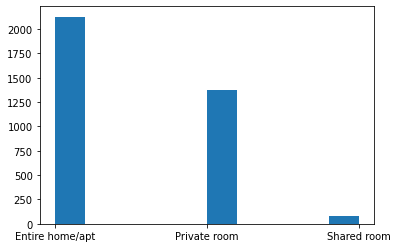

In [110]:
plt.hist(listings.room_type);

### Questions to answer:

> 1) What neighborhood has the most listings?

> 2) How does the canellation policy affect the price and what is the most common one?

> 3) How does the number of rooms affect the price?

> 4) What season is the busiest one?

> 5) What are good indicators of the price?

### Data cleaning & analysis process:

from the listings data frame I will make a data frame with only the columns needed to answer these questions

In [306]:
df_list = listings[['id', 'neighbourhood','city','property_type', 'room_type','bathrooms', 'bedrooms', 'beds', 'bed_type','square_feet','price','weekly_price', 'monthly_price', 'cancellation_policy']]

In [307]:
np.sum(df_list.isnull())

id                        0
neighbourhood             0
city                      2
property_type             3
room_type                 0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
square_feet            2966
price                     0
weekly_price           2243
monthly_price          2251
cancellation_policy       0
dtype: int64

In [290]:
df_list.shape

(3020, 14)

##### The above two lines of code shows that square feet data is almost 100% lost and there is no source of data to fill this column so in ,y opinion the best practice is to drop it.

In [291]:
df_list.price

0       250.0
1        65.0
2        65.0
4        79.0
5        75.0
        ...  
3577    150.0
3579    100.0
3580     69.0
3583     65.0
3584     65.0
Name: price, Length: 3020, dtype: float64

In [292]:
df_list.weekly_price

0           NaN
1       $400.00
2       $395.00
4           NaN
5           NaN
         ...   
3577        NaN
3579        NaN
3580        NaN
3583        NaN
3584        NaN
Name: weekly_price, Length: 3020, dtype: object

##### Also for the weekly and monthly price we can see that a big portion of it is missing I tried to find a way to link or predict the weekly and monthly prices using the price column bu I couldn't so I will be dropping them as will.

##### Also the neighbourhood column has some missing values as will I will drop the rows with those missing values since I have no source of finding out the neighbourhood.

In [308]:
df_list.drop(['weekly_price', 'monthly_price','square_feet'], axis = 1, inplace = True)
df_list.dropna(subset = ['neighbourhood'], how = 'any', inplace = True)
df_list.dropna(inplace = True)
np.sum(df_list.isnull())

C:\Users\adel1\AppData\Local\Temp\ipykernel_2576\249130531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list.drop(['weekly_price', 'monthly_price','square_feet'], axis = 1, inplace = True)
C:\Users\adel1\AppData\Local\Temp\ipykernel_2576\249130531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list.dropna(subset = ['neighbourhood'], how = 'any', inplace = True)
C:\Users\adel1\AppData\Local\Temp\ipykernel_2576\249130531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

id                     0
neighbourhood          0
city                   0
property_type          0
room_type              0
bathrooms              0
bedrooms               0
beds                   0
bed_type               0
price                  0
cancellation_policy    0
dtype: int64

In [309]:
df_list.shape

(3015, 11)

In [310]:
# removing the dollar sign $ and changing the data type of the price column to float
df_list['price'] = df_list['price'].replace({'\$':''}, regex = True)
df_list['price'] = df_list['price'].replace({'\,':''}, regex = True)
df_list = df_list.astype({'price': float}, errors='raise') 
df_list.price

C:\Users\adel1\AppData\Local\Temp\ipykernel_2576\1192830318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['price'] = df_list['price'].replace({'\$':''}, regex = True)
C:\Users\adel1\AppData\Local\Temp\ipykernel_2576\1192830318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['price'] = df_list['price'].replace({'\,':''}, regex = True)


0       250.0
1        65.0
2        65.0
4        79.0
5        75.0
        ...  
3577    150.0
3579    100.0
3580     69.0
3583     65.0
3584     65.0
Name: price, Length: 3015, dtype: float64

## Q1 Procedure:

 ##### Here I will be using the Original Listings DataSet to include as many available neighbourhood as possible insted of usin the df_list DataSet

In [147]:
listings.dropna(subset = ['neighbourhood'], how = 'any', inplace = True)

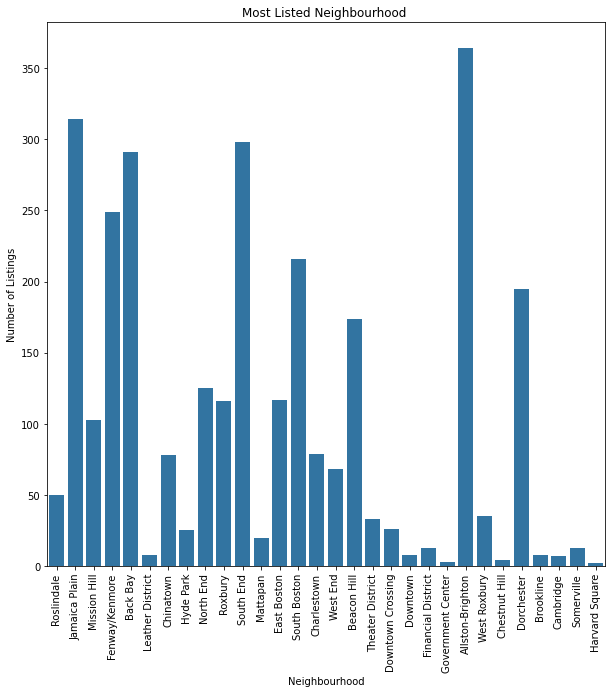

In [158]:
plt.figure(figsize = (10,10))
base_color = sb.color_palette()[0]
sb.countplot(data = listings, x = 'neighbourhood', color = base_color);
plt.xlabel('Neighbourhood');
plt.ylabel('Number of Listings');
plt.title('Most Listed Neighbourhood ');
plt.xticks(rotation = 90);


### Q1 Answer:

##### Analyzing the above plot shows that there are a few neighbourhoods dominating the listings such as Jamaican Plain, Back Bay, South End, and Allston-Brighton but the one neighbourhood with the most listing is the Allston-Brighton. 

## Q2 procedure:

#### For this quetion I will be using the orginal listings DataSet because all the data needed for this question containes no missing values and is ready for use

In [83]:
listings[listings.id == 14844274].price

3581    $150.00
Name: price, dtype: object

In [145]:
# check if there is any duplicatied id in the listings data frame
np.sum(listings.id.duplicated())

0

In [89]:
#check for null price values
np.sum(listings.price.isnull())

0

In [94]:
# removing the dollar sign $ and changing the data type of the price column to float
listings['price'] = listings['price'].replace({'\$':''}, regex = True)
listings['price'] = listings['price'].replace({'\,':''}, regex = True)
listings = listings.astype({'price': float}, errors='raise') 

In [99]:
#lets check if there is any missing values in the cancelation_policey column
np.sum(listings.cancellation_policy.isnull())

0

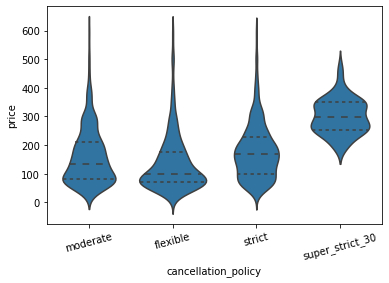

In [106]:
base_color = sb.color_palette()[0]
sb.violinplot(data = listings.query ('price < price.quantile (0.99) '), x = 'cancellation_policy', y = 'price', color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

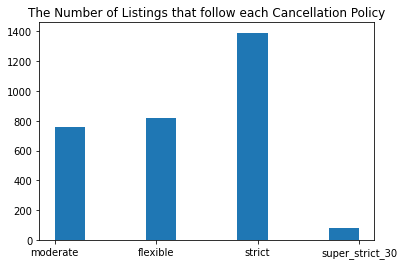

In [166]:
plt.hist(listings.cancellation_policy);
plt.title('The Number of Listings that follow each Cancellation Policy');

### Q2 Answer
##### The above analysis shows that the harder the cancellation_policy the higher the price is. Also the most common cancellation_policy is strict

### Q3 Procedure:

In [189]:
df_list.bedrooms

0       2.0
1       1.0
2       1.0
4       1.0
5       1.0
       ... 
3577    1.0
3579    1.0
3580    1.0
3583    1.0
3584    1.0
Name: bedrooms, Length: 3015, dtype: float64

In [190]:
df_list.bathrooms

0       1.5
1       1.0
2       1.0
4       1.5
5       1.0
       ... 
3577    1.0
3579    1.0
3580    1.0
3583    1.0
3584    1.0
Name: bathrooms, Length: 3015, dtype: float64

In [191]:
df_list.beds

0       3.0
1       1.0
2       1.0
4       2.0
5       1.0
       ... 
3577    1.0
3579    1.0
3580    1.0
3583    1.0
3584    1.0
Name: beds, Length: 3015, dtype: float64

##### we can see that bathrooms and bedrooms are floats and some of them may include numbers like 1.5 which deos not make sense havin one and a half bathroom so I will convert them to Ints 

In [192]:
np.sum(df_list.bedrooms.isnull())

0

In [193]:
np.sum(listings.bathrooms.isnull())

0

In [187]:
np.sum(listings.beds.isnull())

0

In [195]:
df_list = df_list.astype({'bathrooms': int, 'bedrooms': int, 'beds': int}, errors='raise') 

In [311]:
df_list.columns

Index(['id', 'neighbourhood', 'city', 'property_type', 'room_type',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'cancellation_policy'],
      dtype='object')

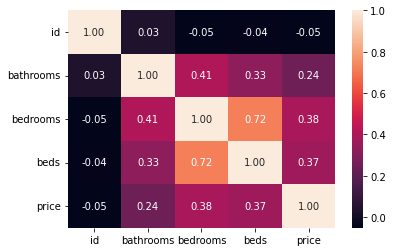

In [312]:
sb.heatmap(df_list.corr(), annot=True, fmt=".2f");

### Q3 Answer:

##### The above analysis suggests that bedrooms have more affect on the price than bathrooms which makes sense because I think people book Airbnb to crash for a few nights not live there for a long period of time.

### Q4 Procedure:

In [209]:
calendar.date[0][5:7]

'09'

In [207]:
calendar.shape

(1308890, 4)

In [210]:
np.sum(calendar.date.isnull())

0

In [211]:
np.sum(calendar.available.isnull())

0

In [246]:
#For this part I will try to add a seasons column
szn = []
for i in range (1308890):
    if calendar.date[i][5:7] in {'03', '04', '05'}:
        szn.append('Spring')
    elif calendar.date[i][5:7] in {'06', '07', '08'}:
        szn.append('Summer')
    elif calendar.date[i][5:7] in {'09', '10', '11'}:
        szn.append('Fall')
    elif calendar.date[i][5:7] in {'12', '01', '02'}:
        szn.append('Winter')
calendar['season'] = szn

In [235]:
len(season)

1308890

In [236]:
season[1308889]

'Fall'

In [250]:
calendar['season']

0          Fall
1          Fall
2          Fall
3          Fall
4          Fall
           ... 
1308885    Fall
1308886    Fall
1308887    Fall
1308888    Fall
1308889    Fall
Name: season, Length: 1308890, dtype: object

In [257]:
avl = []
for i in range(1308890):
    if calendar.available[i] == 'f':
        avl.append('Not Available')
    elif calendar.available[i] == 't':
        avl.append('Available')
calendar['availability'] = avl
calendar.availability

0          Not Available
1          Not Available
2          Not Available
3          Not Available
4          Not Available
               ...      
1308885    Not Available
1308886    Not Available
1308887    Not Available
1308888    Not Available
1308889    Not Available
Name: availability, Length: 1308890, dtype: object

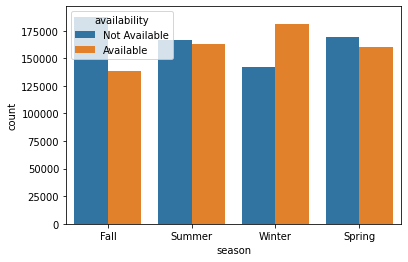

In [258]:
sb.countplot(data = calendar, x = 'season', hue = 'availability');

### Q4 Answer:

##### From the analysis above we can see that the busiest season in Boston is  Fall meanwhile in Winter there is alot of available listings suggesting not a very busy season.
##### During Spring and Summer the number of available and not available listings is almost equal and suggests that it is a bit busy as will. not as busy as Fall.

### Q5 Procedure:

In [296]:
df_list.head()

,id,neighbourhood,city,property_type,room_type,bathrooms,bedrooms,beds,bed_type,price,cancellation_policy
0,12147973,Roslindale,Boston,House,Entire home/apt,1,2,3,Real Bed,250.0,moderate
1,3075044,Roslindale,Boston,Apartment,Private room,1,1,1,Real Bed,65.0,moderate
2,6976,Roslindale,Boston,Apartment,Private room,1,1,1,Real Bed,65.0,moderate
4,7651065,Roslindale,Boston,House,Private room,1,1,2,Real Bed,79.0,flexible
5,12386020,Roslindale,Boston,Condominium,Private room,1,1,1,Real Bed,75.0,flexible


In [297]:
cat_vars = df_list.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df_list = pd.concat([df_list.drop(var, axis=1), pd.get_dummies(df_list[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [298]:
df_list.head()

,id,bathrooms,bedrooms,beds,price,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,...,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,12147973,1,2,3,250.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,3075044,1,1,1,65.0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,6976,1,1,1,65.0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,7651065,1,1,2,79.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,12386020,1,1,1,75.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [299]:
y = df_list['price']
X = df_list
X.drop(['price'], axis = 1, inplace = True)

In [300]:
X.drop(['id'], axis = 1, inplace = True)

In [301]:
X.head()

,bathrooms,bedrooms,beds,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,...,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,1,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1,1,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [302]:
y.head()

0    250.0
1     65.0
2     65.0
4     79.0
5     75.0
Name: price, dtype: float64

In [266]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
r2_scores_test = r2_score(y_test, y_test_preds)
r2_scores_train = r2_score(y_train, y_train_preds)

C:\Users\adel1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\adel1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

C:\Users\adel1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\adel1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

C:\Users\adel1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\adel1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

C:\Users\adel1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\adel1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

C:\Users\adel1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\adel1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

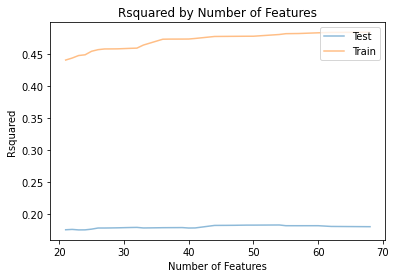

C:\Users\adel1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [303]:
cutoffs = []
for i in range(1, 82):
    cutoffs.append(i)

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [304]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
10,neighbourhood_Downtown Crossing,139.961991,139.961991
13,neighbourhood_Financial District,125.252774,125.252774
3,neighbourhood_Back Bay,113.227647,113.227647
25,neighbourhood_Theater District,103.706938,103.706938
16,neighbourhood_Leather District,99.585725,99.585725
4,neighbourhood_Beacon Hill,97.046203,97.046203
12,neighbourhood_Fenway/Kenmore,85.215417,85.215417
24,neighbourhood_South End,80.917173,80.917173
7,neighbourhood_Chinatown,73.325454,73.325454
9,neighbourhood_Downtown,72.680633,72.680633


##### the above analysis suggests that neighbouhood has the most affect on price and has an indecator of it 